## Setup Jupyter Notebook

In [1]:
from pathlib import Path
import sys

notebook_directory_parent = Path.cwd().resolve().parent.parent
if str(notebook_directory_parent) not in sys.path:
    sys.path.append(str(notebook_directory_parent))

In [12]:
%matplotlib inline

from numpy import linspace
# New feature needed for solving Van Der Pol equation
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

In [3]:
from T1000.numerical.VanDerPol import (van_der_pol, van_der_pol_with_eps)

In [9]:
a, b = 0, 10

mus = [0, 1, 2]
styles = ["-", "--", ":"]
t = linspace(a, b, 500)

/tmp/ipykernel_28097/2099874914.py:5: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = linspace(a, b, 500)


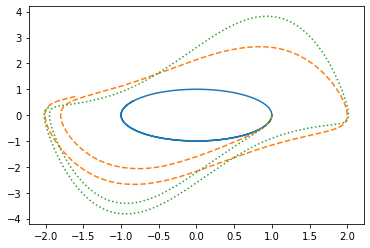

In [5]:
solutions = []

for mu, style in zip(mus, styles):
    vdp_eqn = lambda x, y : van_der_pol(x, y, mu)

    sol = solve_ivp(vdp_eqn, [a, b], [1, 0], t_eval=t)
    solutions.append(sol)
    plt.plot(sol.y[0], sol.y[1], style)

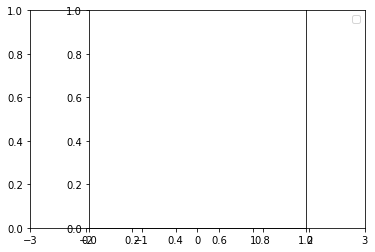

In [19]:
# make a little extra horizontal room for legend
plt.xlim([-3, 3])
plt.legend([f"$\mu={m}$" for m in mus])
plt.axes().set_aspect(1)

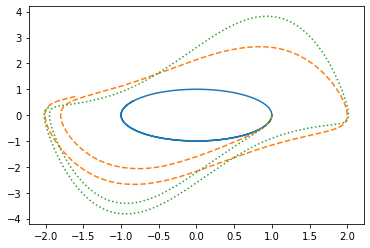

In [21]:
for sol, style in zip(solutions, styles):
    plt.plot(sol.y[0], sol.y[1], style)

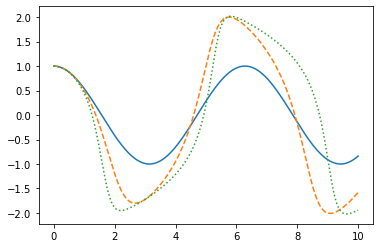

In [22]:
for sol, style in zip(solutions, styles):
    plt.plot(sol.t, sol.y[0], style)

## Calculated values for unit tests

In [13]:
a, b = 0, 2.0

mus = [0, 1, 2]
t = linspace(a, b, 20)

solutions1 = []

eps = 1.0

for mu in mus:
    vdp_eqn = lambda x, y : van_der_pol_with_eps(x, y, eps, mu)

    sol = solve_ivp(vdp_eqn, [a, b], [2, 0], t_eval=t)
    solutions1.append(sol)

In [24]:
print(len(solutions1))
print(type(solutions1[0]))
print(type(solutions1[0].t))
print(len(solutions1[0].t))
print(type(solutions1[0].y))
print(solutions1[0].y.ndim)
print(solutions1[0].y.shape)

3
<class 'scipy.integrate._ivp.ivp.OdeResult'>
<class 'numpy.ndarray'>
20
<class 'numpy.ndarray'>
2
(2, 20)


In [25]:
print(solutions1[1].t)
print(solutions1[1].y[0])
print(solutions1[1].y[1])

[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]
[2.         1.99001531 1.96373712 1.92544337 1.87808283 1.82343095
 1.76269155 1.69650477 1.62508332 1.54840951 1.4662393  1.37809158
 1.2833223  1.18102747 1.07002585 0.94885892 0.81579091 0.66879173
 0.50536802 0.3228295 ]
[ 0.         -0.18038269 -0.31223354 -0.41058163 -0.48687504 -0.54929801
 -0.60359291 -0.65386198 -0.70312129 -0.7538284  -0.80801865 -0.86769084
 -0.93477138 -1.01145789 -1.10029482 -1.2041735  -1.32633209 -1.47028169
 -1.63899526 -1.83348537]


In [30]:
print(mus[1])
for index in range(solutions1[1].y[0].size):
    print(van_der_pol_with_eps(
        solutions1[1].t[index],
        [solutions1[1].y[0][index], solutions1[1].y[1][index]], eps, mus[1]))

1
[0.0, -2.0]
[-0.1803826937734485, -1.4560535077745809]
[-0.31223354205225273, -1.0719158570157303]
[-0.41058163039002404, -0.8138625156690724]
[-0.48687504373875645, -0.6476545930581228]
[-0.5492980091298005, -0.5463677693558335]
[-0.6035929137597037, -0.4908720877449637]
[-0.6538619784127986, -0.4684680017918621]
[-0.7031212872392018, -0.4713345536666331]
[-0.75382839859263, -0.4948800410725622]
[-0.808018652496587, -0.5371328441398118]
[-0.8676908411735249, -0.5979191525565629]
[-0.9347713809593777, -0.6786036164312667]
[-1.0114578872672366, -0.7816777111824667]
[-1.1002948242881245, -0.9105322644951261]
[-1.204173504990997, -1.0688749809159528]
[-1.3263320911227412, -1.2594293531401783]
[-1.4702816858663437, -1.4814423256538596]
[-1.6389952598842674, -1.7257690781206694]
[-1.8334853719079132, -1.9652310683181158]


In [29]:
solutions1[1].y[0].size

20